# Regression Model with Diabetes Database

In [71]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression

In [72]:
filename = os.path.join(os.getcwd(), "diabetes.csv")
df = pd.read_csv(filename)
print(df.head(5))
print(df.shape)
print(list(df.columns))

   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  
(768, 9)
['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome']


* Target Variable is 'Outcome'
* Features: Pregnancies, Glucose, BloodPressure, Skin Thickness, Insulin, BMI, Diabetes Pedigree Function

Logistic Regression is used for low model complexity. Making predictions in medical data sets is best with logistic regression due to the small amount of patient data.

Logistic Regression has a hyperparameter, C, that controls the complexity of the model. A higher C value = less regularization or high complexity. Smaller data sets means you should use lower C value to increase regularization (low complexity)

In [73]:
class LogisticRegression_class(object):
  def __init__(self, tolerance=10**-8, max_iterations=20):
    self.tolerance=tolerance
    self.max_iterations=max_iterations
    self.weights_array=None
    self.prior_w=None
    self.weights=None
    self.intercept=None
  def predict_proba(self,X):
    XW=X.dot(self.weights_array)
    P=(1+np.exp(-1*XW))**-1
    return P
  def compute_gradient(self, X, Y, P):
    G = -1*(Y-P).dot(X)
    return G
  def compute_hessian(self,X,P):
    Q = P*(1-P)
    XQ = X.T * Q
    H = XQ.dot(X)
    return H
  def update_weights(self,X,y):
    P = self.predict_proba(X)
    G = self.compute_gradient(X, y, P)
    H = self.compute_hessian(X, P)
    self.prior_w = self.weights_array
    self.weights_array = self.weights_array - np.linalg.inv(H).dot(G)
  def check_stop(self):
    w_old_norm = self.prior_w / np.linalg.norm(self.prior_w)
    w_new_norm = self.weights_array / np.linalg.norm(self.weights_array)
    diff = w_new_norm - w_old_norm
    distance = np.sqrt(diff.dot(diff))
    stop = (distance < self.tolerance)
    return stop
  def fit(self, X, y):
    self.weights_array = np.zeros(X.shape[1] + 1)
    self.weights_array[-1] = np.log(y.mean() / (1-y.mean()))
    X_int = np.hstack((X, np.ones((X.shape[0],1))))
    for i in range(self.max_iterations):
      self.update_weights(X_int, y)
      stop = self.check_stop()
      if stop:
        self.set_final_weights()
        self.set_final_intercept()
        break
  def set_final_weights(self):
    self.weights = self.weights_array[0:-1]
  def set_final_intercept(self):
    self.intercept = self.weights_array[-1]
  def get_weights(self):
    return self.weights
  def get_intercept(self):
    return self.intercept

* use the class to train a logistic regression model
* train the model to predict if a new patient has diabetes based on diagnostic measurements

In [74]:
filename = os.path.join(os.getcwd(), "diabetes.csv")
df = pd.read_csv(filename, header=0)

In [75]:
list(df.columns)
feature_list=['Pregnancies',
 'Glucose',
 'BloodPressure',
 'SkinThickness',
 'Insulin',
 'BMI',
 'DiabetesPedigreeFunction',
 'Age']

In [76]:
y = df['Outcome']
X = df[feature_list]

In [77]:
logistic_regression = LogisticRegression_class()
logistic_regression.fit(X,y)
print('The fitted weights and intercept are:')
print(logistic_regression.get_weights(), logistic_regression.get_intercept())

The fitted weights and intercept are:
[ 1.23182298e-01  3.51637146e-02 -1.32955469e-02  6.18964365e-04
 -1.19169898e-03  8.97009700e-02  9.45179741e-01  1.48690047e-02] -8.404696366914143


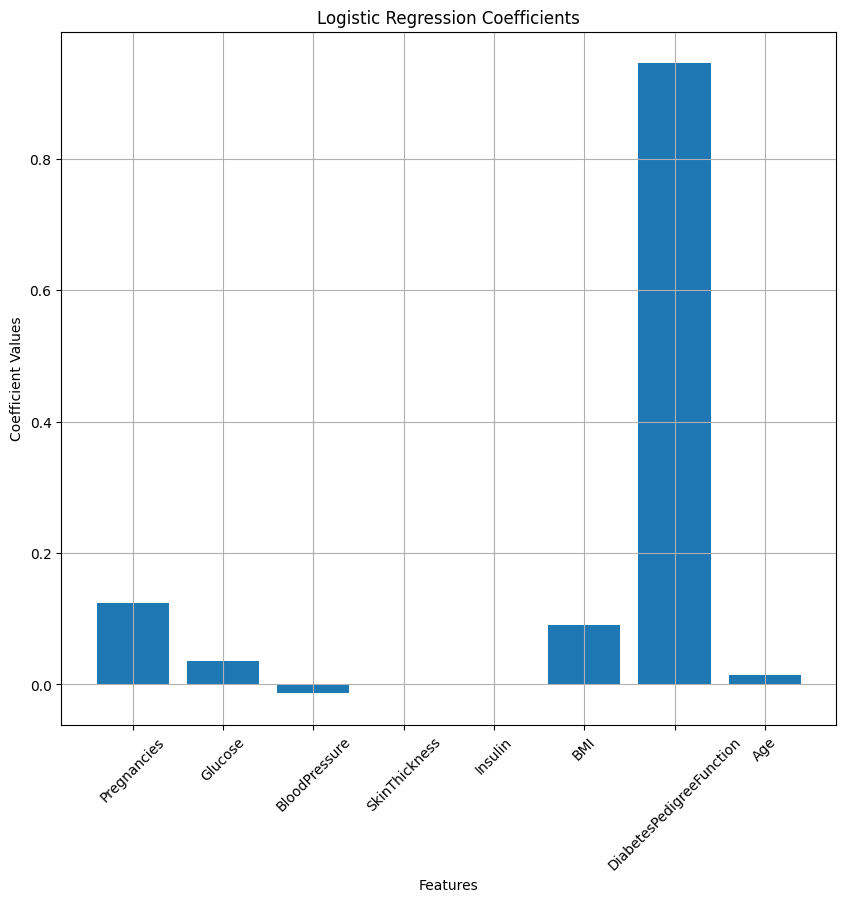

In [78]:
weights = logistic_regression.get_weights()
intercept = logistic_regression.get_intercept()

# ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome']
plt.figure(figsize=(10, 9))
bars = plt.bar(feature_list, weights)
plt.xlabel('Features')
plt.ylabel('Coefficient Values')
plt.title('Logistic Regression Coefficients')

plt.xticks(rotation=45)
plt.grid(True)

plt.show()

#Analysis:
## The bar chart visualizes which feature has the highest predictive value for the label. The feature for diabetes pedigree function strongly indicates whether the patient will have diabetes.

**Compare with Scikit-Learn**

In [79]:
logistic_regression_sk = LogisticRegression(C=10, max_iter=1000) #low C value due to small dataset
logistic_regression_sk.fit(X,y)
print('The fitted weights and intercept with sklearn are:')
print(logistic_regression_sk.coef_, logistic_regression_sk.intercept_)

The fitted weights and intercept with sklearn are:
[[ 1.23095495e-01  3.51566751e-02 -1.32921400e-02  6.32825973e-04
  -1.18910258e-03  8.96726059e-02  9.36476944e-01  1.48894762e-02]] [-8.39978871]


In [80]:
%timeit logistic_regression.fit(df[feature_list], df['Outcome'])

3.37 ms ± 190 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [81]:
%timeit logistic_regression_sk.fit(df[feature_list], df['Outcome'])

28 ms ± 6.13 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
